In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Dados de entrada
df = pd.read_csv("Prestigio.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
df.describe()

,education,income,women,prestige,census
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


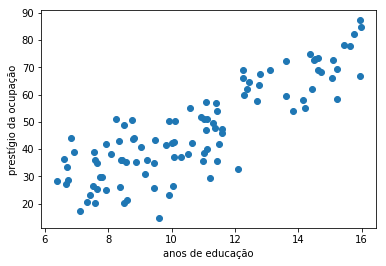

In [10]:
# Constrói os gráficos de dispersão
plt.scatter(x=df.education,y=df.prestige)
plt.xlabel("anos de educação")
plt.ylabel("prestígio da ocupação")
plt.show()

C:\Users\Mariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


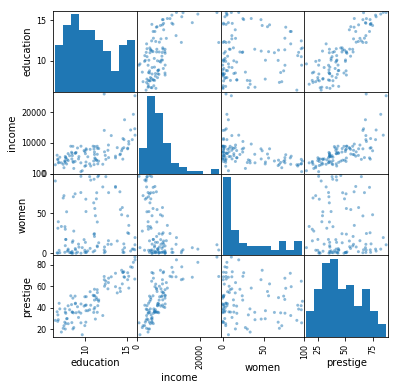

In [31]:
from pandas.plotting import scatter_matrix

df = df[["education","income","women","prestige","type"]]

# Constrói os gráficos de dispersão em pares
scatter_matrix(df, alpha = 0.5, figsize = (6, 6), diagonal = 'hist')
corr = df.corr().as_matrix()
plt.show()

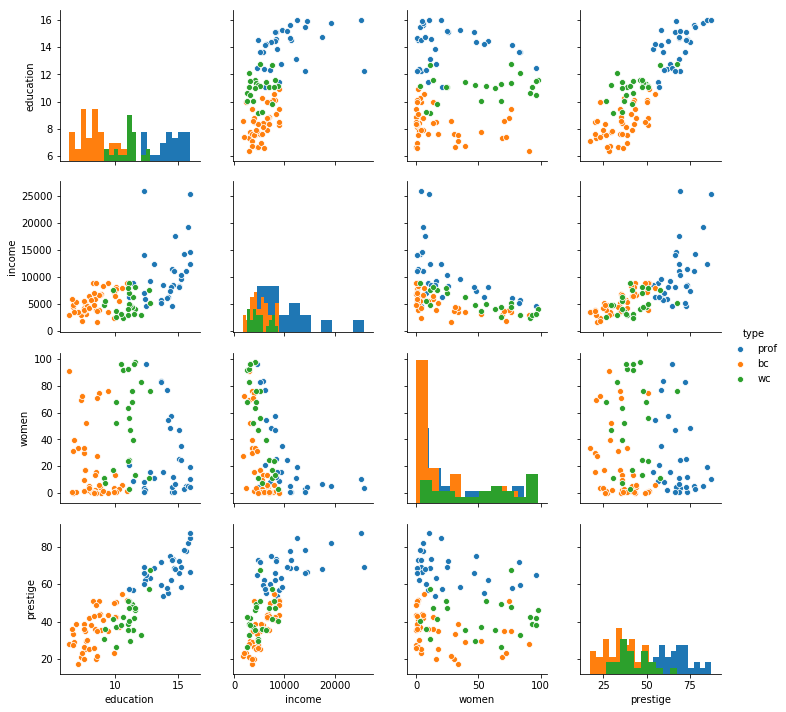

In [33]:
import seaborn as sns

# Outra maneira, diferenciando por "type"
sns.pairplot(df, hue = 'type',diag_kind = "hist")

In [73]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear múltipla com Prestige como variável resposta
mod = ols('df.prestige ~ df.income + df.education + df.women',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           6.26e-34
Time:                        20:49:52   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.7943      3.239     -2.098   

In [89]:
# Calcula as variáveis centradas
income_c = df.income-np.mean(df.income)
education_c = df.education-np.mean(df.education)
women_c = df.women-np.mean(df.women)

# Modelo de regressão com as variáveis explicativas centradas
mod = ols('df.prestige ~ income_c + education_c + women_c',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.26e-34
Time:                        16:08:11   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.8333      0.777     60.281      

In [90]:
# Modelo de regressão com a variável "income" transformada
l_income = np.log2(df.income) # base 2
le_income = np.log(df.income) # base e

mod = ols('df.prestige ~ l_income + df.education + df.women',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 21 May 2020   Prob (F-statistic):           3.21e-38
Time:                        17:02:36   Log-Likelihood:                -342.51
No. Observations:                 102   AIC:                             693.0
Df Residuals:                      98   BIC:                             703.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -110.9658     14.843     -7.476   

In [86]:
# Estimativa da variância do erro (sigma2), que é o MSE=SQE/(n-p)
res.mse_resid

50.30495279445397

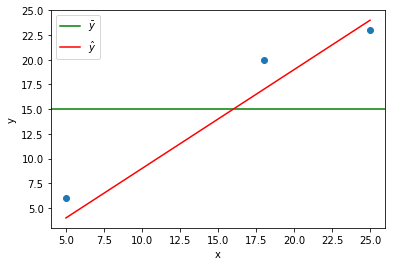

In [67]:
# Constrói o gráfico para explicar as somas de quadrados total, do modelo e dos erros

x = np.array([5, 18, 25]).reshape((-1, 1))
y = np.array([6, 20, 23])

plt.scatter(x=x,y=y)
plt.axhline(y=15, color = 'g', label=r'$\bar{y}$')
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, x-1, 'k-', color = 'r', label="$\hat{y}$")
plt.legend()
plt.show()

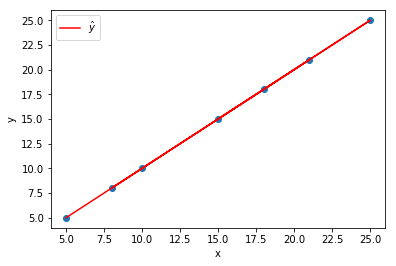

In [71]:
x = np.array([5, 18, 25, 8, 10, 21, 15]).reshape((-1, 1))
y = np.array([5, 18, 25, 8, 10, 21, 15])

# Constróio o gráfico para explicar R2=1
plt.scatter(x=x,y=y)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, x, 'k-', color = 'r', label="$\hat{y}$")
plt.legend()
plt.show()

In [174]:
# valores preditos de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Elabora os gráficos de todos os resíduos

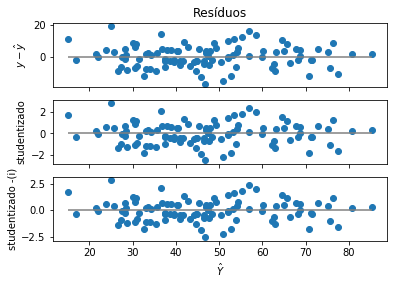

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

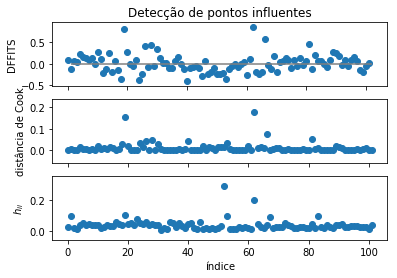

In [185]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
ax1.hlines(0,xmin=1,xmax=102,color='gray')
ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')
ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

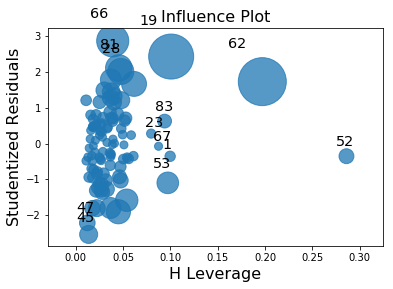

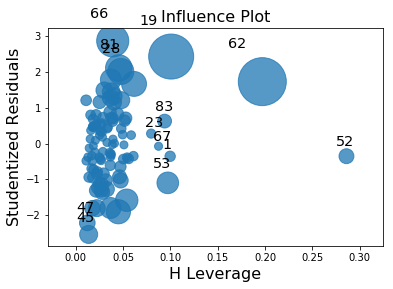

In [102]:
import statsmodels.api as sm

# Gráficos dos resíduos
sm.graphics.influence_plot(res)

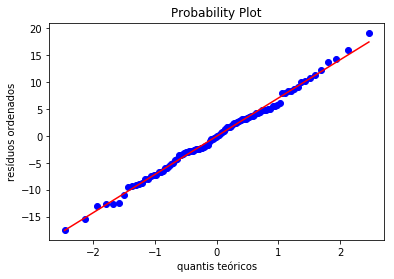

In [191]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

In [293]:
import pandas as pd

# Transforma variável categorizada para o modelo de regressão
dummies = pd.get_dummies(df.type, drop_first=True)
df.join(dummies)

,occupation,education,income,women,prestige,census,type,prof,wc
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,1,0
1,general.managers,12.26,25879,4.02,69.1,1130,prof,1,0
2,accountants,12.77,9271,15.70,63.4,1171,prof,1,0
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,1,0
4,chemists,14.62,8403,11.68,73.5,2111,prof,1,0
5,physicists,15.64,11030,5.13,77.6,2113,prof,1,0
6,biologists,15.09,8258,25.65,72.6,2133,prof,1,0
7,architects,15.44,14163,2.69,78.1,2141,prof,1,0
8,civil.engineers,14.52,11377,1.03,73.1,2143,prof,1,0
9,mining.engineers,14.64,11023,0.94,68.8,2153,prof,1,0


In [206]:
# Modelo de regressão com a variável "income" transformada e variável type

mod = ols('df.prestige ~ l_income+df.education+df.women+df.type',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 22 May 2020   Prob (F-statistic):           1.71e-38
Time:                        08:27:19   Log-Likelihood:                -318.49
No. Observations:                  98   AIC:                             649.0
Df Residuals:                      92   BIC:                             664.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -115.6722     18.802     

In [263]:
# Modelo de regressão final?
mod = ols('df.prestige ~ l_income+df.education',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 22 May 2020   Prob (F-statistic):           6.11e-39
Time:                        11:44:29   Log-Likelihood:                -343.78
No. Observations:                 102   AIC:                             693.6
Df Residuals:                      99   BIC:                             701.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -95.1940     10.998     -8.656   

In [296]:
# Modelo de regressão com interação entre variáveis
mod = ols('df.prestige ~ df.type*(df.income)',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df.prestige   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     88.94
Date:                Fri, 22 May 2020   Prob (F-statistic):           1.08e-33
Time:                        12:51:06   Log-Likelihood:                -330.34
No. Observations:                  98   AIC:                             672.7
Df Residuals:                      92   BIC:                             688.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

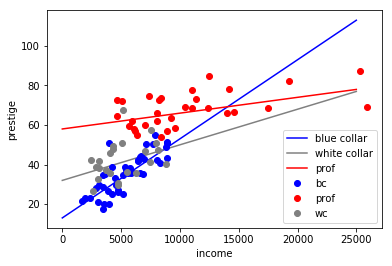

In [292]:
import itertools

##### Entendendo o que é a interação
x = np.linspace(0,25000)
y1 = 13 + 0.004*x # blue collar
y2 =(13+18.98) + (0.004-0.0022)*x # white collar
y3 = (13+45) + (0.004-0.0032)*x    # prof

plt.plot(x, y1, label="blue collar", color="blue")
plt.plot(x, y2, label="white collar", color="gray")
plt.plot(x, y3, label="prof",color="red")
colors = itertools.cycle(["b", "r", "gray"])
groups = df.groupby("type")
for name, group in groups:
    plt.plot(group["income"], group["prestige"], marker="o", linestyle="", label=name, color=next(colors))
plt.legend()
plt.xlabel("income")
plt.ylabel("prestige")
plt.show()